# BIOS512 Assignment #5

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [22]:
library('tidyverse')

In [23]:
wind_turbine <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv')

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
wind_turbine |> head()

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

In [25]:
province = wind_turbine |>
    mutate(province_territory = fct_infreq(province_territory)) |>
    pull(province_territory)

province

[1] Alberta                   Alberta                  
   [3] Alberta                   Alberta                  
   [5] Alberta                   Alberta                  
   [7] Alberta                   Alberta                  
   [9] Alberta                   Alberta                  
  [11] Alberta                   Alberta                  
  [13] Alberta                   Alberta                  
  [15] Alberta                   Alberta                  
  [17] Alberta                   Alberta                  
  [19] Alberta                   Alberta                  
  [21] Alberta                   Alberta                  
  [23] Alberta                   Alberta                  
  [25] Alberta                   Alberta                  
  [27] Alberta                   Alberta                  
  [29] Alberta                   Alberta                  
  [31] Alberta                   Alberta                  
  [33] Alberta                   Alberta                  
  [35] Alberta                   Alberta                  
  [37] Alberta                   Alberta                  
  [39] Alberta                   Alberta                  
  [41] Alberta                   Alberta                  
  [43] Alberta                   Alberta                  
  [45] Alberta                   Alberta                  
  [47] Alberta                   Alberta                  
  [49] Alberta                   Alberta                  
  [51] Alberta                   Alberta                  
  [53] Alberta                   Alberta                  
  [55] Alberta                   Alberta                  
  [57] Alberta                   Alberta                  
  [59] Alberta                   Alberta                  
  [61] Alberta                   Alberta                  
  [63] Alberta                   Alberta                  
  [65] Alberta                   Alberta                  
  [67] Alberta                   Alberta                  
  [69] Alberta                   Alberta                  
  [71] Alberta                   Alberta                  
  [73] Alberta                   Alberta                  
  [75] Alberta                   Alberta                  
  [77] Alberta                   Alberta                  
  [79] Alberta                   Alberta                  
  [81] Alberta                   Alberta                  
  [83] Alberta                   Alberta                  
  [85] Alberta                   Alberta                  
  [87] Alberta                   Alberta                  
  [89] Alberta                   Alberta                  
  [91] Alberta                   Alberta                  
  [93] Alberta                   Alberta                  
  [95] Alberta                   Alberta                  
  [97] Alberta                   Alberta                  
  [99] Alberta                   Alberta                  
 [101] Alberta                   Alberta                  
 [103] Alberta                   Alberta                  
 [105] Alberta                   Alberta                  
 [107] Alberta                   Alberta                  
 [109] Alberta                   Alberta                  
 [111] Alberta                   Alberta                  
 [113] Alberta                   Alberta                  
 [115] Alberta                   Alberta                  
 [117] Alberta                   Alberta                  
 [119] Alberta                   Alberta                  
 [121] Alberta                   Alberta                  
 [123] Alberta                   Alberta                  
 [125] Alberta                   Alberta                  
 [127] Alberta                   Alberta                  
 [129] Alberta                   Alberta                  
 [131] Alberta                   Alberta                  
 [133] Alberta                   Alberta                  
 [135] Alberta                   Alberta          

In [26]:
province %>% table

.
                  Ontario                    Quebec                   Alberta 
                     2663                      1991                       900 
              Nova Scotia          British Columbia              Saskatchewan 
                      310                       292                       153 
                 Manitoba             New Brunswick      Prince Edward Island 
                      133                       119                       104 
Newfoundland and Labrador     Northwest Territories                     Yukon 
                       27                         4                         2 

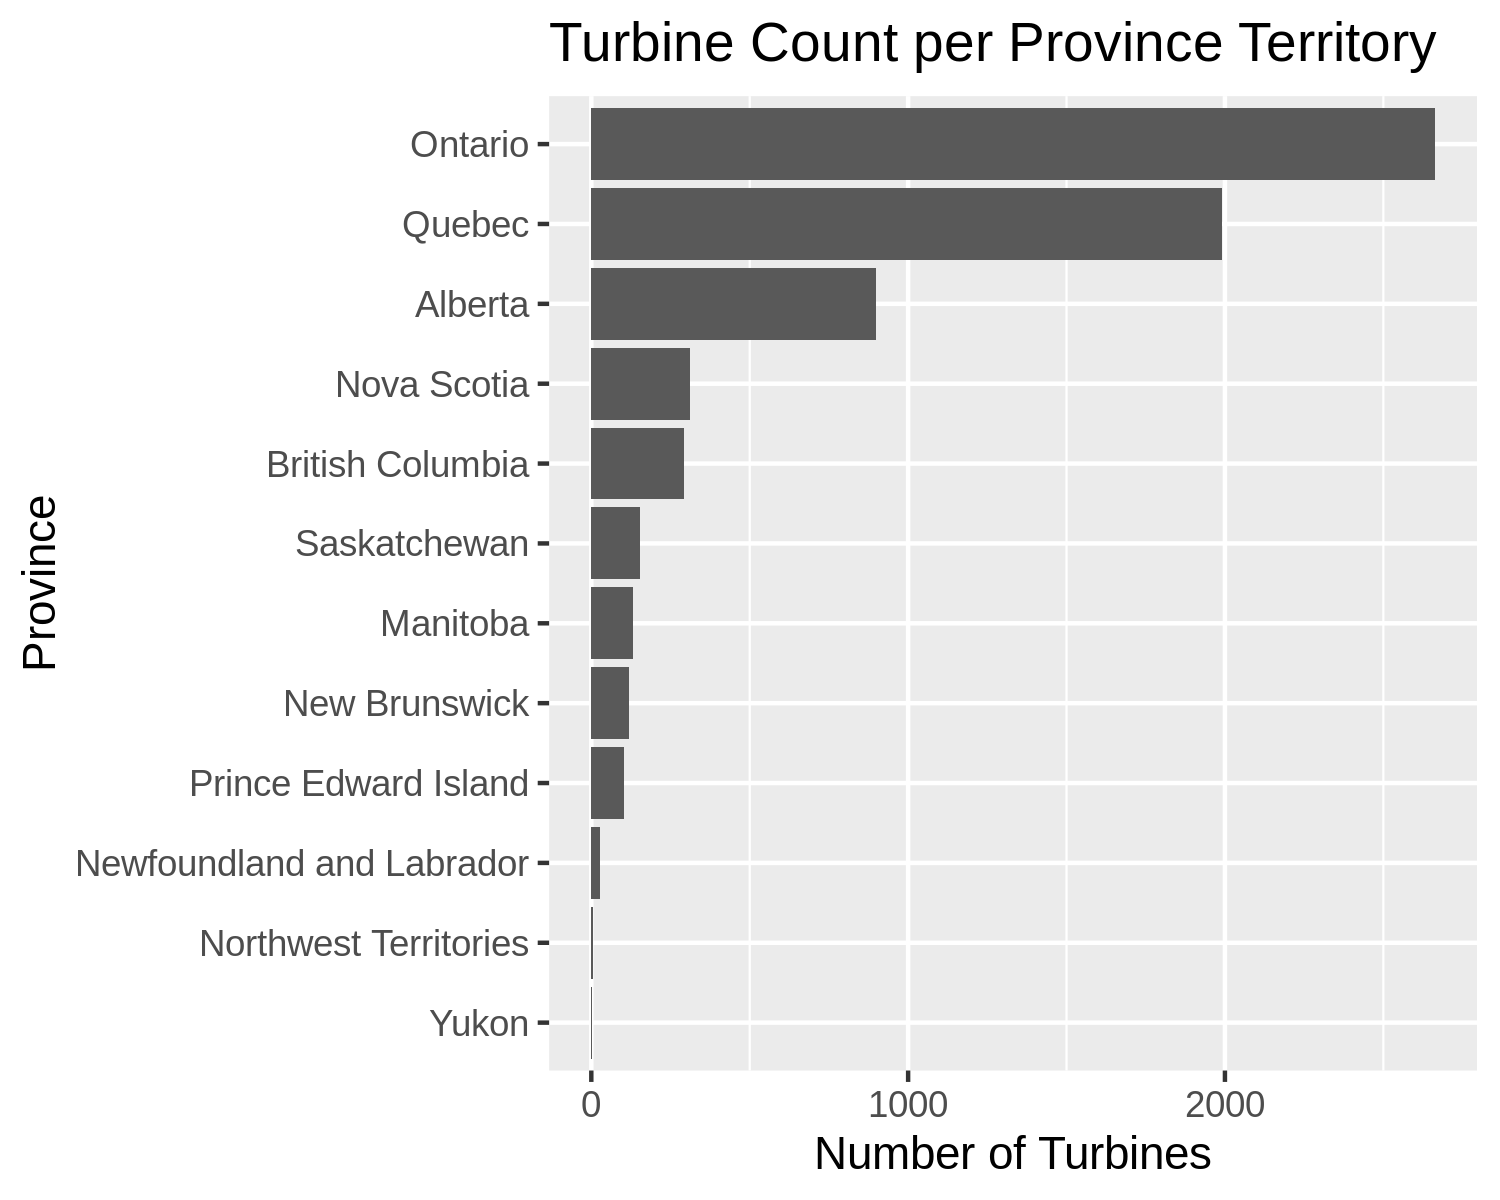

In [27]:
province2 = wind_turbine |>
    mutate(province_territory = fct_infreq(province_territory) |> fct_rev())

p = ggplot(province2, aes(y = province_territory)) + geom_bar() +
    labs(title = 'Turbine Count per Province Territory', x = 'Number of Turbines', y = 'Province')

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

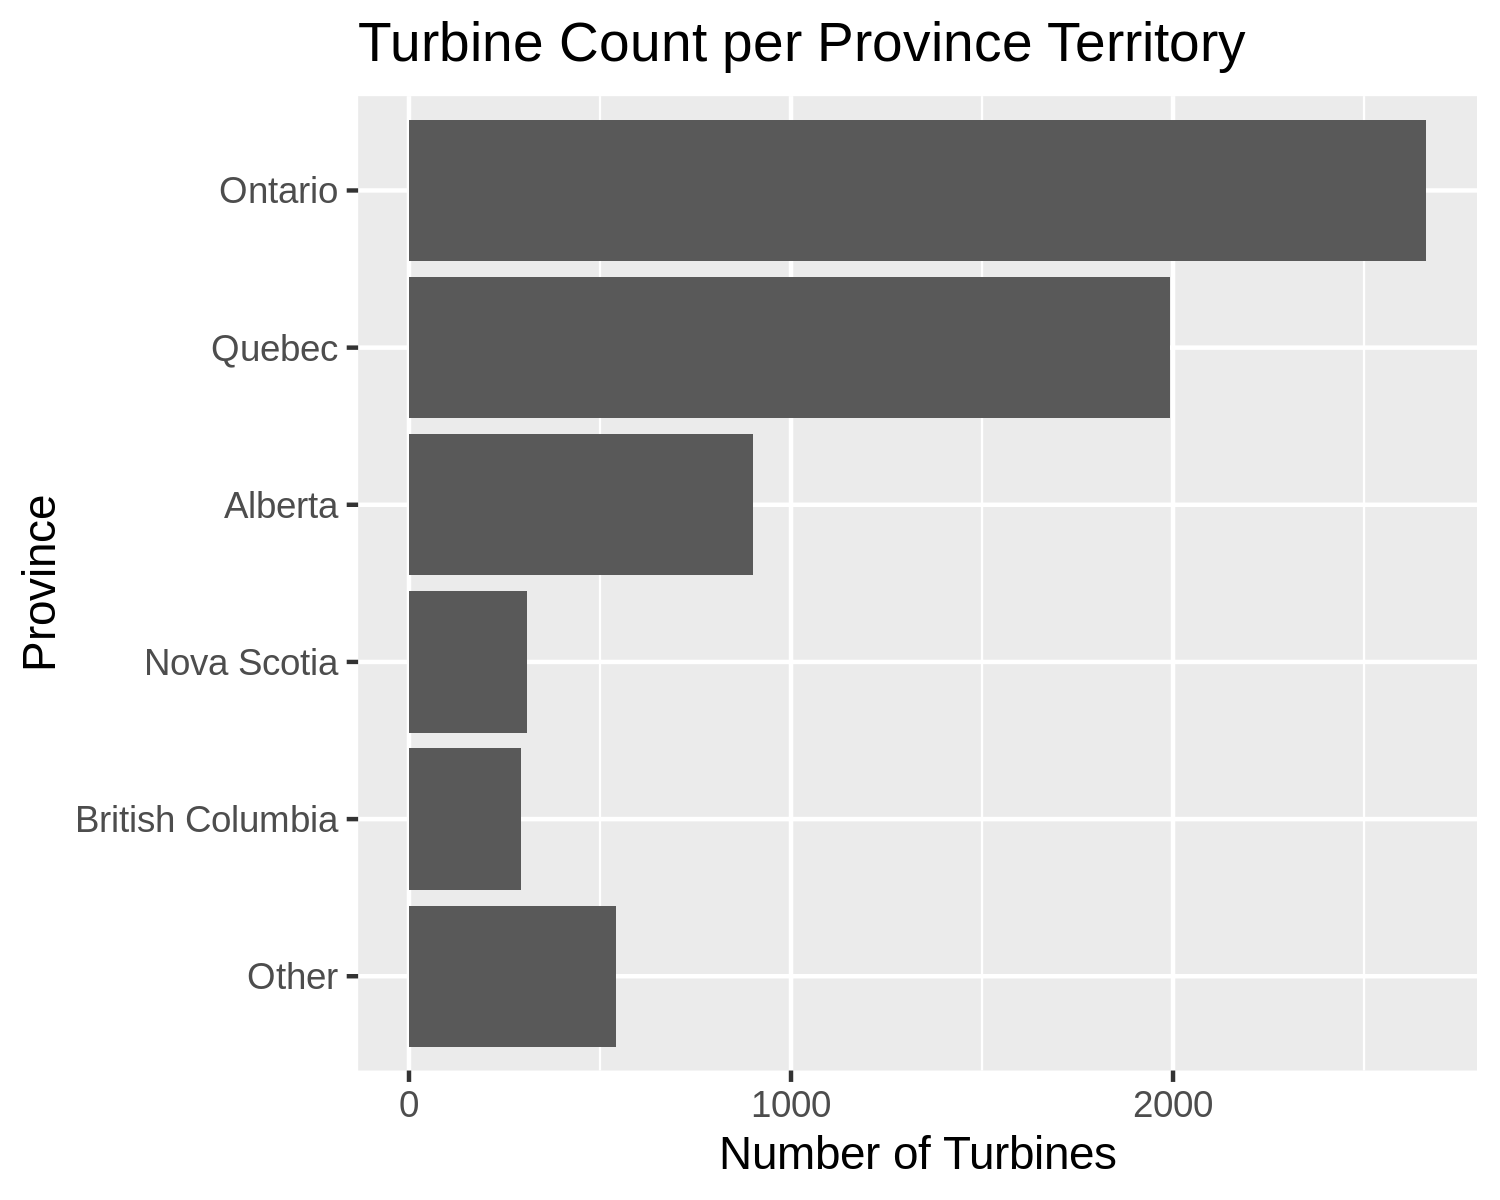

In [32]:
province3 = province2 |>
    mutate(province_territory = province_territory |>
        fct_lump(n =5) |>
        fct_infreq() |> fct_rev() |>
        fct_relevel('Other'))

p = ggplot(province3, aes(y = province_territory)) + geom_bar() +
    labs(title = 'Turbine Count per Province Territory', x = 'Number of Turbines', y = 'Province')

p